In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [44]:
df=pd.read_csv('Order1.csv')

In [45]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [46]:
df.shape

(38765, 3)

In [47]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [48]:
transactions = df.groupby(['Member_number','Date'])
transactions.count()

itemDescription
Member_number Date                       
1000          15-03-2015                4
              24-06-2014                3
              24-07-2015                2
              25-11-2015                2
              27-05-2015                2
...                                   ...
4999          24-01-2015                6
              26-12-2015                2
5000          09-03-2014                2
              10-02-2015                3
              16-11-2014                2

[14963 rows x 1 columns]

In [49]:
support = (df['itemDescription'].value_counts()/14693*100)
support

itemDescription
whole milk               17.028517
other vegetables         12.917716
rolls/buns               11.679031
soda                     10.304227
yogurt                    9.079153
                           ...    
rubbing alcohol           0.034030
bags                      0.027224
baby cosmetics            0.020418
kitchen utensil           0.006806
preservation products     0.006806
Name: count, Length: 167, dtype: float64

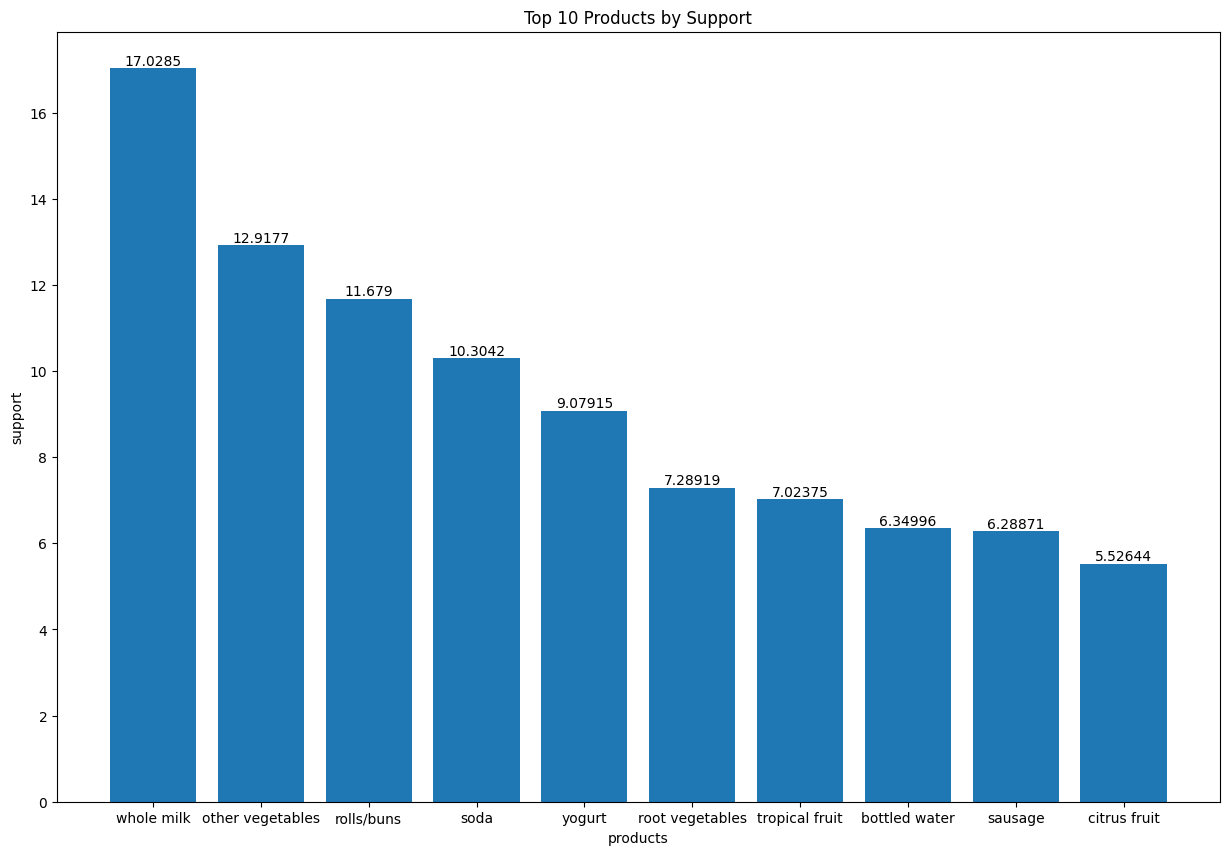

In [54]:
plt.figure(figsize=(15,10))
bars = plt.bar(x=np.arange(len(support.head(10))), height=(support).head(10))
plt.bar_label(bars)
plt.xticks(ticks=np.arange(len(support.head(10))), labels=support.index[:10])
plt.title('Top 10 Products by Support')
plt.xlabel('products')
plt.ylabel('support')
plt.show()


In [55]:
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transactions)]
list_transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [59]:
rules = apriori(list_transactions, min_support=0.001, min_confidence=0.05, min_lift= 1.2,max_length=2)
result = list(rules)
print(len(result))

28


In [62]:
for item in result:
    pair=item[0]
    items=[x for x in pair]
    print("Rule "+ items[0] +"-> "+ items[1])
    print("support: "+str(item[1]))
    print("Confidence: "+str(item[2][0][2]))
    print("Lift: "+ str(item[2][0][3]))
    print("_____________________________________________")

Rule beverages-> sausage
support: 0.0015371249081066632
Confidence: 0.09274193548387098
Lift: 1.5367636551995143
_____________________________________________
Rule sausage-> bottled beer
support: 0.003341575887188398
Confidence: 0.07374631268436578
Lift: 1.2220000849348451
_____________________________________________
Rule sugar-> bottled water
support: 0.0014702933903628951
Confidence: 0.0830188679245283
Lift: 1.368074141800349
_____________________________________________
Rule canned beer-> brown bread
support: 0.0024059346387756467
Confidence: 0.06394316163410303
Lift: 1.3629366489046777
_____________________________________________
Rule candy-> citrus fruit
support: 0.0010024727661565194
Confidence: 0.06976744186046512
Lift: 1.3131197893813076
_____________________________________________
Rule canned beer-> white bread
support: 0.0015371249081066632
Confidence: 0.06406685236768803
Lift: 1.3655730939853503
_____________________________________________
Rule cat food-> tropical fruit
